## 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                                  Version
---------------------------------------- --------------
absl-py                                  2.1.0
accelerate                               0.31.0
aiohttp                                  3.9.5
aiosignal                                1.3.1
alembic                                  1.13.2
annotated-types                          0.7.0
anyio                                    4.3.0
appdirs                                  1.4.4
argon2-cffi                              23.1.0
argon2-cffi-bindings                     21.2.0
arrow                                    1.3.0
asgiref                                  3.8.1
asttokens                                2.4.1
astunparse                               1.6.3
async-lru                                2.0.4
attrs                                    23.2.0
Babel                                    2.14.0
backoff                                  2.2.1
bcrypt                                   4.

In [3]:
import tensorflow as tf
import os

## 2. Remove dodgy images

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\padha\AppData\Local\Temp\ipykernel_7276\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
data_directory = 'C:\\Users\\padha\\Documents\\kaggle\\data'

In [7]:
os.listdir(data_directory)

['happy', 'sad']

In [8]:
os.listdir(os.path.join(data_directory,'happy'))

['0312-png_1200.png',
 '05-12-21-happy-people.jpg',
 '0_681081322.png',
 '1000_F_170569163_8JkA7Kb4DJmW7mdYHDt20RElX9A59sT7.jpg',
 '1000_F_250942959_bq2Ue3V9KDc4pXiZkafRBRfU2A5BH9Rj.jpg',
 '1000_F_38064890_H0vhLXPugCMaxRnEzXtASpmml1NKhqrp.jpg',
 '1000_F_49226343_zrW0Mlu6hqxzgN2gUBwW8EGaHmD5GZU6.jpg',
 '1000_F_52240713_tkGe7BziDM9oU6GvjvCHCsif9LdLb6UK.jpg',
 '106701784-1600112459978-gettyimages-1210809980-3q4a2717.jpeg',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_1.jpeg',
 '1164211-happy-womens-day.jpeg',
 '116528918-happy-cute-little-girl-playing-in-the-outdoor-park.jpg',
 '1200px-Flickr_-_Sukanto_Debnath_-_A_happy_man.jpg',
 '121eff727b0ec259c5c36cfcff30ce95.jpg',
 '1427647-12345678.webp',
 '143585090-joyful-a-very-happy-man.jpg',
 '14412150-happy-boy.jpg',
 '154c990515c5fac6d58408544cd73fbf.png',
 '162267209.jpg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 '180253378.jpg',
 '187334608.jpg',
 '1920px-face-smile-svg_.png',
 '1x1.png

In [9]:
imgg = cv2.imread(os.path.join(data_directory,'happy','56f455011e0000b300705475.jpeg'))

In [10]:
print(imgg)

[[[230 242 248]
  [230 242 248]
  [230 242 248]
  ...
  [ 35  36  50]
  [ 32  33  47]
  [ 33  33  47]]

 [[230 242 248]
  [230 242 248]
  [230 242 248]
  ...
  [ 34  36  47]
  [ 32  34  45]
  [ 32  32  44]]

 [[230 242 248]
  [230 242 248]
  [230 242 248]
  ...
  [ 33  35  46]
  [ 31  33  44]
  [ 32  32  44]]

 ...

 [[172 190 173]
  [175 192 178]
  [176 193 180]
  ...
  [ 15  12   8]
  [  5   2   0]
  [ 22  17  14]]

 [[173 192 173]
  [176 194 177]
  [176 194 177]
  ...
  [ 10   7   3]
  [ 10   7   3]
  [ 15  10   7]]

 [[174 193 174]
  [176 195 176]
  [177 195 178]
  ...
  [ 10   7   3]
  [ 19  16  12]
  [  8   3   0]]]


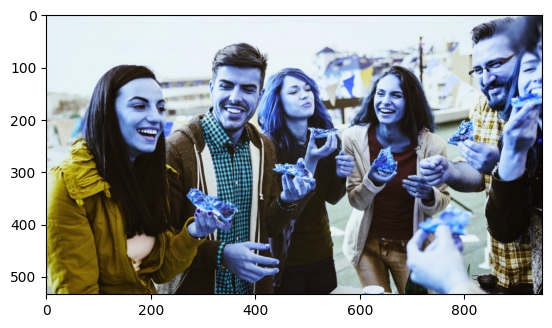

In [11]:
plt.imshow(imgg)

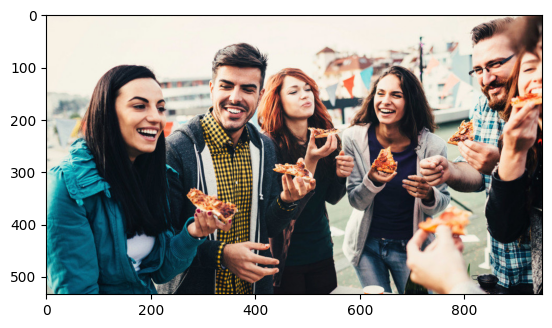

In [12]:
plt.imshow(cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB))

In [13]:
for image_class in os.listdir(data_directory): 
    for image in os.listdir(os.path.join(data_directory, image_class)):
        image_path = os.path.join(data_directory, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\1427647-12345678.webp
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\24px.svg
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\6983958-happy-girl.jpg.txt
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\7015861-happy-girl-wallpaper.jpg.txt
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\927a5b21b6d44290aed0ab2a7455c412.webp
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\a-bearded-man-is-meditating-outdoor-in-the-park-with-face-ra.jpg
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\AAtG3Sqi9SCuM3LBGCJx785C4RLwsRKVxXMqKO_dPt5b8f2Fbmt6ovD6so9n.jpg
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\alone-but-happy-girl-poster-mgn-346-large-original-imae5f7ms.jpeg
Image not in ext list C:\Users\padha\Documents\kaggle\data\happy\beauty-shot-of-beautiful-black-woman-in-monochromatic-pink-s.jpg
Image not in ext list

In [14]:
for image_class in os.listdir(data_directory):
    print(image_class)

happy
sad


## 3. Load Data

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory(data_directory)

Found 1109 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
batch[1],len(batch[1])

(array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0]),
 32)

In [20]:
len(batch[0])

32

In [21]:
batch[0].shape

(32, 256, 256, 3)

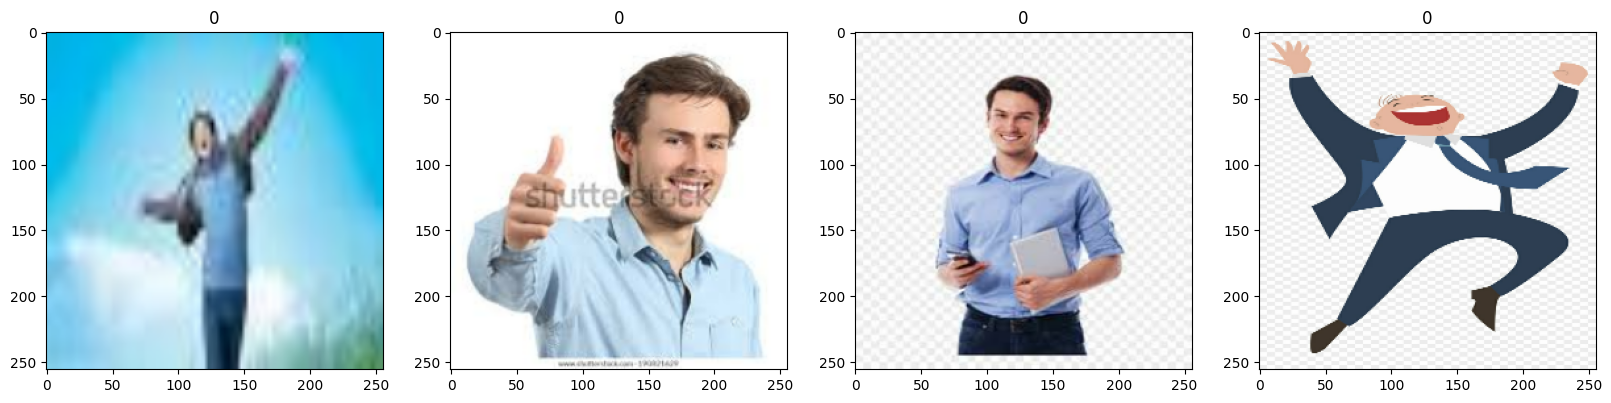

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
# class 0 : happy people
# class 1 : sad people

## 4. Preprocessing

In [24]:
data = data.map(lambda x,y: (x/255, y))

## 5. Split data

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [26]:
train_size,val_size,test_size

(24, 8, 4)

In [27]:
len(data)

35

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Deep learning Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\padha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Training

In [34]:
logdir = 'logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6860 - loss: 0.5973 - val_accuracy: 0.7695 - val_loss: 0.5068
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8220 - loss: 0.4147 - val_accuracy: 0.7617 - val_loss: 0.4960
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8321 - loss: 0.3526 - val_accuracy: 0.7891 - val_loss: 0.4353
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8916 - loss: 0.2839 - val_accuracy: 0.8594 - val_loss: 0.3434
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9152 - loss: 0.2140 - val_accuracy: 0.8711 - val_loss: 0.3355
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9479 - loss: 0.1751 - val_accuracy: 0.8750 - val_loss: 0.3170
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9528 - loss: 0.1643 - val_accuracy: 0.8906 - val_loss: 0.2808
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9657 - loss: 0.1155 - val_accuracy: 0.9023 - val_loss:

## 8. Plot Performance

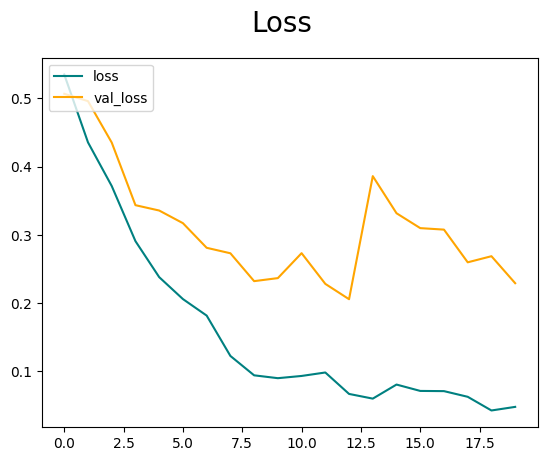

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

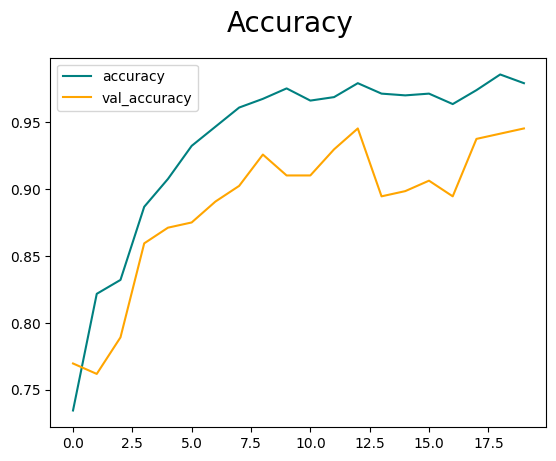

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


In [42]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.8333333 0.7894737 0.91764706


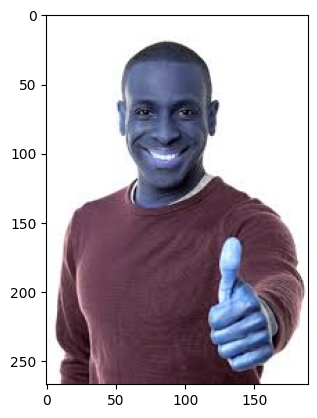

In [51]:
img = cv2.imread('hpyb.jpg')
plt.imshow(img)
plt.show()

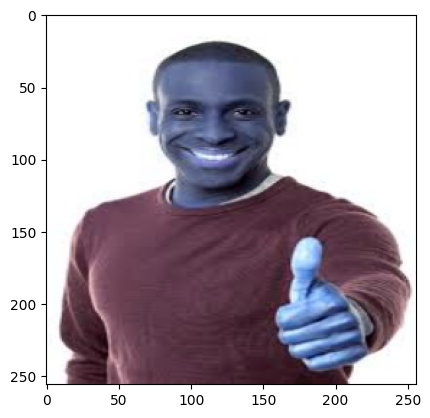

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [54]:
yhat

array([[0.0490337]], dtype=float32)